In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import pandas as pd

In [2]:
dataset = pd.read_csv('CollegeMsg.txt', delimiter=' ', header=None)
dataset.columns = ['source', 'target', 'timestamp']
edge_list = [(row['source'], row['target'], int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [4]:
delta = 30 #seconds

## PaCo

In [5]:
def execute_paco(delta, k):
    start = time()
    C = paco(data, delta, k)
    end = time()
    
    count = sum(C.values())
    return count, end-start

In [6]:
results = []
for k in trange(1, 6):
    count, runtime = execute_paco(delta, k)
    results.append((count, runtime, k))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.76it/s]


In [7]:
_, paco_runtimes_sec, paco_k = zip(*results)

## Baseline

In [8]:
t = create_temporal_network(edge_list)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59835/59835 [00:01<00:00, 57093.10it/s]


In [9]:
results = []
for k in trange(1, 6):
    count, runtime = get_total_causal_paths(t, delta, k)
    results.append((count, runtime, k))

  0%|                                                                                                                                                                                         | 0/5 [00:00<?, ?it/s]

2023-12-17 21:14:52 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:15:06 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1814534
Roots:		57872
Leaves:		1754873
Links:		1793940
Acyclic:	None

2023-12-17 21:15:06 [Severity.INFO]	Generating causal trees for 57872 root nodes ...
2023-12-17 21:15:10 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		58100.0 
[Unique / Sub paths / Total]: 	[21444.0 / 122316.0 / 180416.0]
Nodes:				1899 
Edges:				20296
Max. path length:		6
Avg path length:		1.0334767641996558 
Paths of length k = 0		0.0 [ 0.0 / 118145.0 / 118145.0 ]
Paths of length k = 1		56364.0 [ 19940.0 / 3681.0 / 60045.0 ]
Paths of length k = 2		1582.0 [ 1354.0 / 363.0 / 1945.0 ]
Paths of length k = 3		113.0 [ 111.0 / 96.0 / 209.0 ]
Paths of length k = 4		30.0 [ 28.0 / 25.0 / 55.0 ]
Paths of length k = 5		8.0 [ 8.0 / 6.0 / 14.0 ]
Paths of length k = 6		3.0 [ 3.0 / 0.0 / 3.0 ]




 20%|███████████████████████████████████▍                                                                                                                                             | 1/5 [00:18<01:13, 18.47s/it]

2023-12-17 21:15:10 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:15:24 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1814534
Roots:		57872
Leaves:		1754873
Links:		1793940
Acyclic:	None

2023-12-17 21:15:24 [Severity.INFO]	Generating causal trees for 57872 root nodes ...
2023-12-17 21:15:28 [Severity.INFO]	finished.


 40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 2/5 [00:36<00:54, 18.24s/it]

Number of causal paths: Total path count: 		58100.0 
[Unique / Sub paths / Total]: 	[21444.0 / 122316.0 / 180416.0]
Nodes:				1899 
Edges:				20296
Max. path length:		6
Avg path length:		1.0334767641996558 
Paths of length k = 0		0.0 [ 0.0 / 118145.0 / 118145.0 ]
Paths of length k = 1		56364.0 [ 19940.0 / 3681.0 / 60045.0 ]
Paths of length k = 2		1582.0 [ 1354.0 / 363.0 / 1945.0 ]
Paths of length k = 3		113.0 [ 111.0 / 96.0 / 209.0 ]
Paths of length k = 4		30.0 [ 28.0 / 25.0 / 55.0 ]
Paths of length k = 5		8.0 [ 8.0 / 6.0 / 14.0 ]
Paths of length k = 6		3.0 [ 3.0 / 0.0 / 3.0 ]


2023-12-17 21:15:28 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:15:43 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1814534
Roots:		57872
Leaves:		1754873
Links:		1793940
Acyclic:	None

2023-12-17 21:15:43 [Severity.INFO]	Generating causal trees for 57872 root nodes ...
2023-12-17 21:15:46 [Severity.INFO]	finished.


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 3/5 [00:55<00:37, 18.51s/it]

Number of causal paths: Total path count: 		58100.0 
[Unique / Sub paths / Total]: 	[21444.0 / 122316.0 / 180416.0]
Nodes:				1899 
Edges:				20296
Max. path length:		6
Avg path length:		1.0334767641996558 
Paths of length k = 0		0.0 [ 0.0 / 118145.0 / 118145.0 ]
Paths of length k = 1		56364.0 [ 19940.0 / 3681.0 / 60045.0 ]
Paths of length k = 2		1582.0 [ 1354.0 / 363.0 / 1945.0 ]
Paths of length k = 3		113.0 [ 111.0 / 96.0 / 209.0 ]
Paths of length k = 4		30.0 [ 28.0 / 25.0 / 55.0 ]
Paths of length k = 5		8.0 [ 8.0 / 6.0 / 14.0 ]
Paths of length k = 6		3.0 [ 3.0 / 0.0 / 3.0 ]


2023-12-17 21:15:47 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:16:01 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1814534
Roots:		57872
Leaves:		1754873
Links:		1793940
Acyclic:	None

2023-12-17 21:16:01 [Severity.INFO]	Generating causal trees for 57872 root nodes ...
2023-12-17 21:16:04 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		58100.0 
[Unique / Su

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 4/5 [01:13<00:18, 18.28s/it]

2023-12-17 21:16:05 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:16:20 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1814534
Roots:		57872
Leaves:		1754873
Links:		1793940
Acyclic:	None

2023-12-17 21:16:20 [Severity.INFO]	Generating causal trees for 57872 root nodes ...
2023-12-17 21:16:23 [Severity.INFO]	finished.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:31<00:00, 18.38s/it]

Number of causal paths: Total path count: 		58100.0 
[Unique / Sub paths / Total]: 	[21444.0 / 122316.0 / 180416.0]
Nodes:				1899 
Edges:				20296
Max. path length:		6
Avg path length:		1.0334767641996558 
Paths of length k = 0		0.0 [ 0.0 / 118145.0 / 118145.0 ]
Paths of length k = 1		56364.0 [ 19940.0 / 3681.0 / 60045.0 ]
Paths of length k = 2		1582.0 [ 1354.0 / 363.0 / 1945.0 ]
Paths of length k = 3		113.0 [ 111.0 / 96.0 / 209.0 ]
Paths of length k = 4		30.0 [ 28.0 / 25.0 / 55.0 ]
Paths of length k = 5		8.0 [ 8.0 / 6.0 / 14.0 ]
Paths of length k = 6		3.0 [ 3.0 / 0.0 / 3.0 ]




In [10]:
_, baseline_runtimes_sec, baseline_k = zip(*results)

## Plots

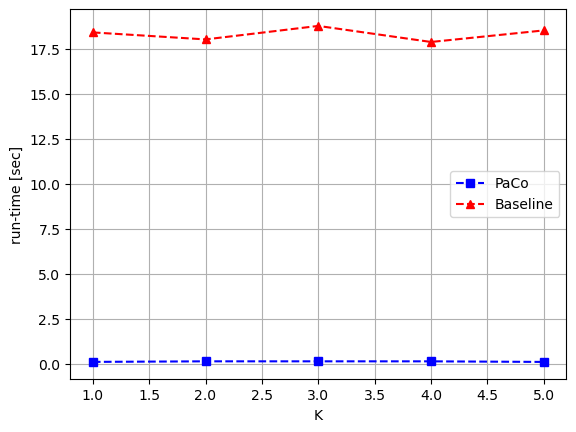

In [11]:
plt.plot(paco_k, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_k, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("K")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/collegemsg_right_panel.png')
plt.show()